In [28]:
!pip install openpyxl

In [29]:
import openpyxl as xl
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt


In [30]:
df=pd.read_excel('VQA_RAD Dataset Public.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [31]:
print("The total length of this dataset is: ", len(df))
print("The total number of images are: ", 315)

The total length of this dataset is:  2248
The total number of images are:  315


In [32]:
df.head(3)

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED


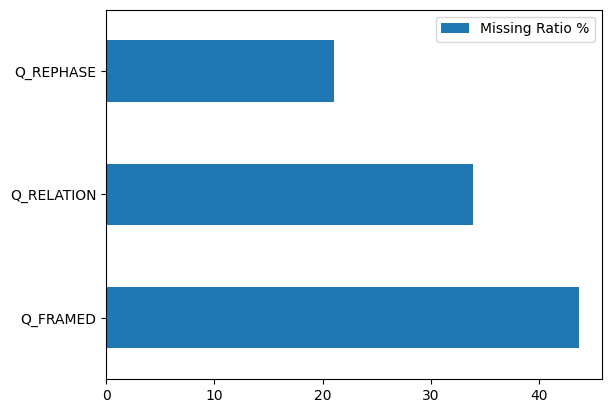

In [33]:
def plot_Nans(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
plot_Nans(df)

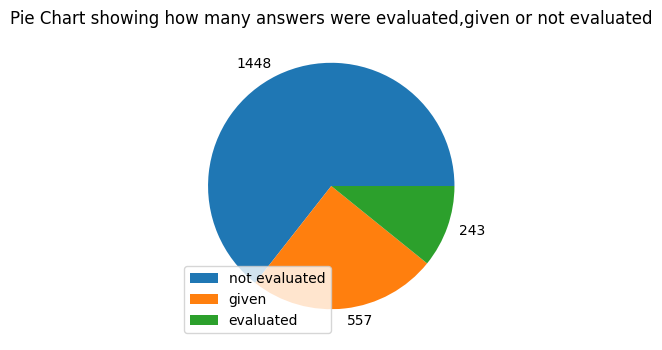

In [34]:
plt.figure(figsize=(5,4))
plt.pie(df['EVALUATION'].value_counts(), labels=df['EVALUATION'].value_counts())
plt.legend(df['EVALUATION'].unique(), loc='lower left')
plt.title("Pie Chart showing how many answers were evaluated,given or not evaluated")
plt.show()

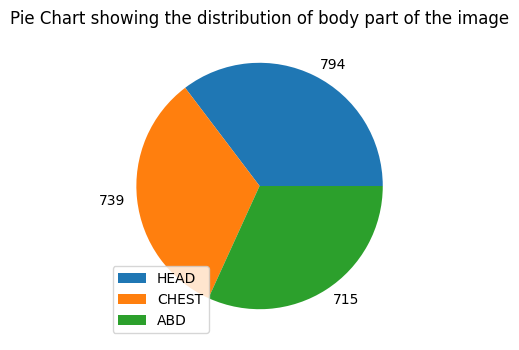

In [35]:
plt.figure(figsize=(5,4))
plt.pie(df['IMAGEORGAN'].value_counts(), labels=df['IMAGEORGAN'].value_counts())
plt.legend(df['IMAGEORGAN'].unique(), loc='lower left')
plt.title('Pie Chart showing the distribution of body part of the image')
plt.show()

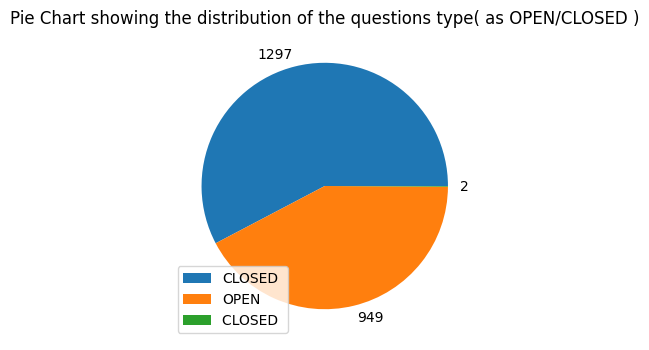

In [36]:
plt.figure(figsize=(5,4))
plt.pie(df['A_TYPE'].value_counts(), labels=df['A_TYPE'].value_counts())
plt.legend(df['A_TYPE'].unique(), loc='lower left')
plt.title("Pie Chart showing the distribution of the questions type( as OPEN/CLOSED )")
plt.show()

In [37]:
df['ANSWER'].value_counts()

No                               486
Yes                              347
yes                              239
no                               120
Axial                             28
                                ... 
decreased muscle bulk              1
acute stroke                       1
4                                  1
XR                                 1
Right vs left sided pathology      1
Name: ANSWER, Length: 557, dtype: int64

We can see from the above table that most of the answers( more than 50%) are Binary Classification that is YES/NO and there are only 557 possible distinct answers in the dataset

In [38]:
print("The total number of distinct answers to the 2248 questions are: ",len(df['ANSWER'].value_counts()))

The total number of distinct answers to the 2248 questions are:  557


In [39]:
df.head(2)

,QID_unique,QID_para,QID_linked,IMAGEID_case,IMAGEID,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,https://medpix.nlm.nih.gov/case?id=48e1dd0e-85...,https://medpix.nlm.nih.gov/images/full/synpic5...,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,https://medpix.nlm.nih.gov/case?id=b197277b-69...,https://medpix.nlm.nih.gov/images/full/synpic2...,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED


In [40]:
IMAGE_IDs=[]
for i in df['IMAGEID']:
    x=i.split('/')[5]
    IMAGE_IDs.append(x)
IMAGE_IDs[0:5]

['synpic54610.jpg',
 'synpic29265.jpg',
 'synpic29265.jpg',
 'synpic28602.jpg',
 'synpic29265.jpg']

In [41]:
df['IMAGE_ID']=IMAGE_IDs

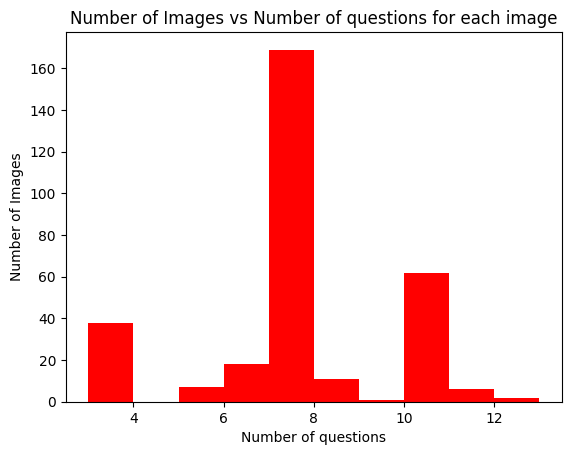

In [42]:
plt.hist(df['IMAGE_ID'].value_counts(),color='red')
plt.xlabel('Number of questions')
plt.ylabel('Number of Images')
plt.title('Number of Images vs Number of questions for each image')
plt.show()

The above is the distribution of the number of questions for each image<br>
There are approximately 175 images(almost 56%) have 8 questions for them

In [43]:
df.drop(columns=['IMAGEID','IMAGEID_case'],inplace=True)
# Since I have already created a new column called IMAGE_ID which contains the image id

In [44]:
df.head(3)

,QID_unique,QID_para,QID_linked,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,IMAGE_ID
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg


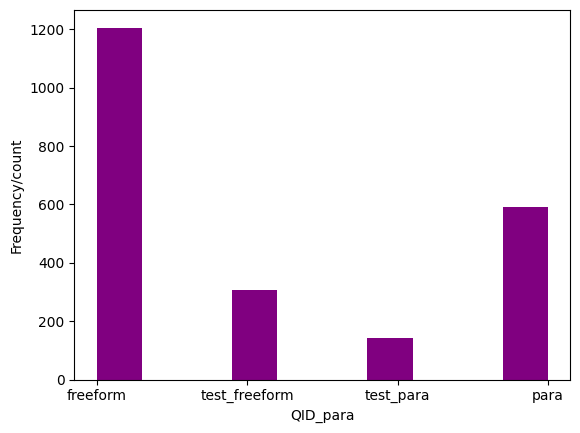

In [45]:
plt.hist(df['QID_para'], color='purple')
plt.xlabel('QID_para')
plt.ylabel('Frequency/count')
plt.show()

In [46]:
def word_count(review):
    review_list=[]
    review_list = review.split()
    return len(review_list)

In [47]:
df['ANSWER']=df['ANSWER'].astype(str)

In [48]:
df['answer_length']=df['ANSWER'].apply(word_count)

In [49]:
df.head(3)

,QID_unique,QID_para,QID_linked,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,IMAGE_ID,answer_length
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg,1
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg,1
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg,1


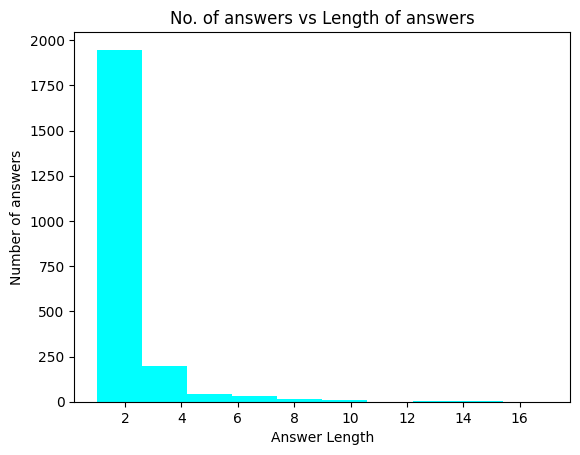

1     1665
2      282
3      125
4       71
5       41
6       16
7       15
8       13
9        8
13       5
14       4
10       2
17       1
Name: answer_length, dtype: int64

In [50]:
plt.hist(df['answer_length'], color='cyan')
plt.xlabel('Answer Length')
plt.ylabel('Number of answers')
plt.title('No. of answers vs Length of answers')
plt.show()
df['answer_length'].value_counts()

In [51]:
df['question_length']=df['QUESTION'].apply(word_count)

In [52]:
df.head(3)

,QID_unique,QID_para,QID_linked,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,IMAGE_ID,answer_length,question_length
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg,1,6
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg,1,5
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg,1,6


Using the formula for score of each word as suggested in the report.<br>
Score(each word) = 1/length of answer


In [53]:
df['score']=1/df['answer_length']
df.head(3)

,QID_unique,QID_para,QID_linked,IMAGEORGAN,EVALUATION,QUESTION,Q_REPHASE,Q_RELATION,Q_FRAMED,Q_TYPE,ANSWER,A_TYPE,IMAGE_ID,answer_length,question_length,score
0,0,freeform,03f451ca-de62-4617-9679-e836026a7642,HEAD,not evaluated,Are regions of the brain infarcted?,NaN,NaN,NaN,PRES,Yes,CLOSED,synpic54610.jpg,1,6,1.0
1,1,freeform,06e26b2c-04b9-42bc-8e98-1de30a0f7682,CHEST,not evaluated,Are the lungs normal appearing?,NaN,NaN,NaN,ABN,No,CLOSED,synpic29265.jpg,1,5,1.0
2,2,freeform,0d0e8b6b-7753-4788-9b6d-dc7f25250c3f,CHEST,not evaluated,Is there evidence of a pneumothorax,NaN,NaN,NaN,PRES,No,CLOSED,synpic29265.jpg,1,6,1.0
